<a href="https://colab.research.google.com/github/pathaksamridhi/AI-Assistant/blob/main/UCSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

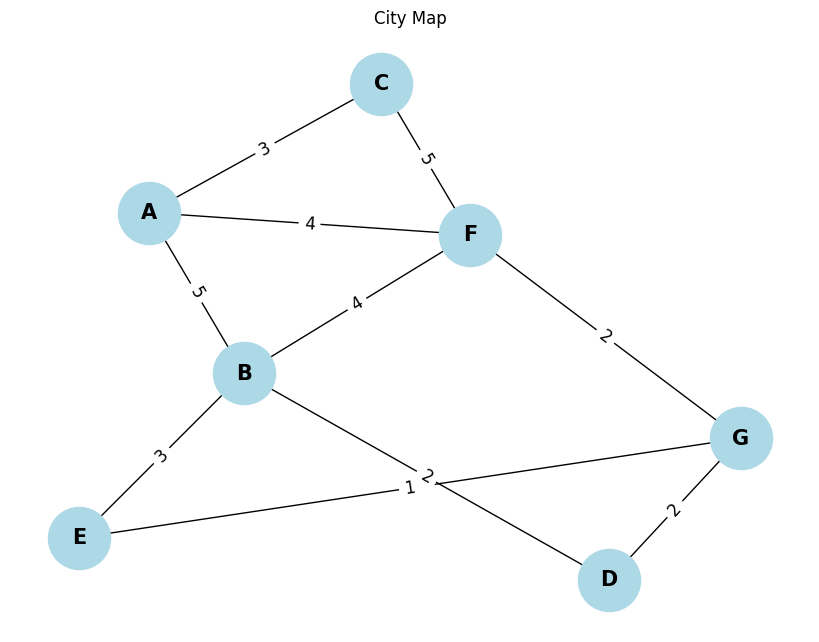

Enter the start city: A
Enter the goal city: D
Least cost path from A to D: A -> B -> D with total cost 7


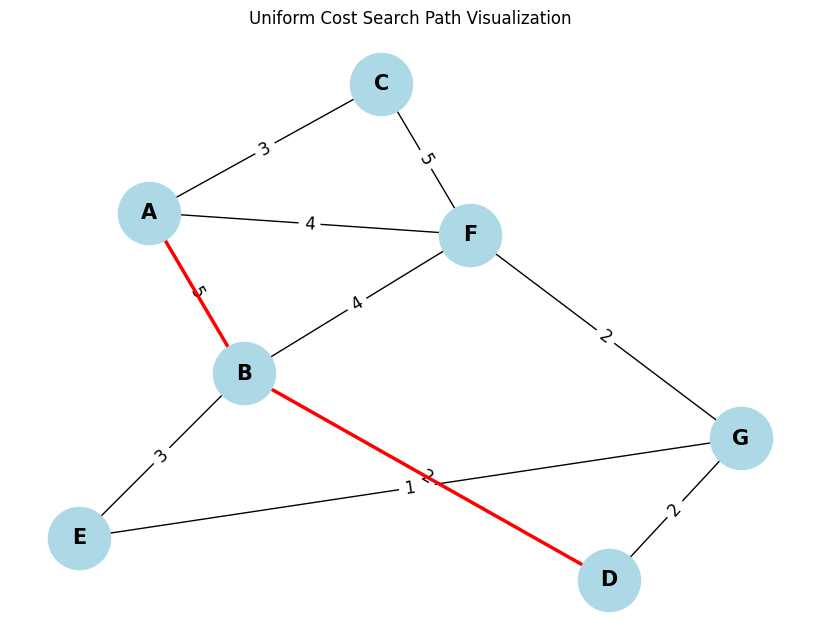

In [ ]:
import heapq  # To implement Priority Queue
import networkx as nx  # Library to create, analyze, and visualize complex networks and graphs
import matplotlib.pyplot as plt

# Uniform Cost Search Implementation
def ucs(graph, start, goal):
    # Priority queue to store frontier nodes; initialized with start node
    priority_queue = [(0, start)]
    # Dictionary to store the shortest path to each node
    visited = {start: (0, None)}

    while priority_queue:
        # Pop the frontier node with the least cumulative cost from the starting node
        curr_cost, curr_node = heapq.heappop(priority_queue)

        # If the goal node is found
        if curr_node == goal:
            return curr_cost, reconstruct_path(visited, start, goal)

        # Explore the neighbors of the current node
        for neighbor, cost in graph[curr_node]:
            total_cost = curr_cost + cost

            # If neighbor hasn't been visited, or we found a cheaper path to it
            if neighbor not in visited or total_cost < visited[neighbor][0]:
                visited[neighbor] = (total_cost, curr_node)
                heapq.heappush(priority_queue, (total_cost, neighbor))

    # If the goal is unreachable, return None
    return None

# Reconstruct the path from the visited dictionary
def reconstruct_path(visited, start, goal):
    path = []
    curr = goal

    # Trace the path backward from goal to start
    while curr is not None:
        path.append(curr)
        curr = visited[curr][1]  # Get the parent node

    # Reverse the path since it was traced backward
    path.reverse()
    return path

# Create a graph using NetworkX
def create_graph(graph):
    G = nx.Graph()
    for node, value in graph.items():
        for neighbor, weight in value:
            G.add_edge(node, neighbor, weight=weight)
    pos = nx.spring_layout(G, seed=34)  # Position nodes using spring layout
    return G, pos

# Visualize the graph and the UCS path
def visualize(G, pos, path=None):
    edge_labels = nx.get_edge_attributes(G, 'weight')  # Get edge weights
    plt.figure(figsize=(8, 6))  # Set the figure size

    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=2000, font_size=15, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                               edge_color='red', width=2.5)
        plt.title("Uniform Cost Search Path Visualization")
    else:
        plt.title("City Map")

    plt.show()

# Graph represented as an Adjacency List
graph = {
    'A': [('B', 5), ('C', 3), ('F', 4)],
    'B': [('A', 5), ('D', 2), ('E', 3), ('F', 4)],
    'C': [('A', 3), ('F', 5)],
    'D': [('B', 2), ('G', 2)],
    'E': [('B', 3), ('G', 1)],
    'F': [('A', 4), ('B', 4), ('C', 5), ('G', 2)],
    'G': [('D', 2), ('E', 1), ('F', 2)]
}

# Create and visualize the graph
G, pos = create_graph(graph)
visualize(G, pos)

# Input for start and goal cities
start = input("Enter the start city: ").strip()
goal = input("Enter the goal city: ").strip()

# Validate input cities
if start not in graph or goal not in graph:
    print("Invalid city entered. Please check and try again.")
else:
    # Perform Uniform Cost Search
    result = ucs(graph, start, goal)

    if result:
        total_cost, path = result
        print(f"Least cost path from {start} to {goal}: {' -> '.join(path)} with total cost {total_cost}")
        visualize(G, pos, path)
    else:
        print(f"No path found from {start} to {goal}")
